# Série 6 - Exercices - Solution

Les mouvements de convections jouent un rôle important dans la modélisation de la météo, du climat, ou encore des mouvements controlant la tectonique des plaques au sein du manteau terrestre. Leur modélisation requiert de résoudre des équations aux dérivées partielles faisant intervenir la dynamique des fluides. 

En 1963, Lorenz en propose une version simplifiée qui permet d'étudier certaines caractéristiques importantes de ces équations. Il donne le système d'équations différentielles: 

$$\frac{dx}{dt} = \sigma ( y - x )$$
$$\frac{dy}{dt} = x ( \rho - z ) - y$$
$$\frac{dz}{dt} = x y - \beta z$$

Avec $x$, $y$, et $z$ trois variables qui décrivent une version très simplifiée d'un système atmosphérique comportant des cellules de convection.  $x$ represente l’intensite du mouvement de convection, $y$ représente la différence de température entre les courants ascendants et descendants et $z$ est proportionnel à l'écart entre le profil vertical de température et une tendance linéaire.

On vous demande de résoudre ce système d'équations pour  :
- Le cas avec les paramètres $\sigma = 10 $, $\rho = 28$, $\beta = 8 / 3$
- sur un intervalle de temps de 0 à 30 unités

Il faut résoudre le cas deux fois avec comme valeurs initiales :
- $x=-9.7554, y=8.75,  z=24.747$
- $x=-9.7555, y=8.75,  z=24.747$

Faire le graphe de l'évolution du système dans les deux cas. Superposez les courbes. Que constatez-vous ? Commentaire ?

Si vous avez la curiosité et le temps, faites un graphe en trois dimensions de $x$, $y$ et $z$ pour tous les pas de temps que vous aurez calculé. Vous pouvez utiliser la commande `plot3D` de matplotlib.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

Pour résoudre le système d'équations différentielles, nous allons utiliser la fonction solve_ivp de scipy. On doit donc définir la fonction qui renvoit les trois dérivées.

In [2]:
sigma = 10 # Sigma
rho = 28 # Rho
beta = 8 / 3 # Beta

def dvdt(t,v):
    dv = np.zeros(3)
    dv[0] = sigma * ( v[1] - v[0] )
    dv[1] = v[0] * ( rho - v[2] ) - v[1] 
    dv[2] =  v[0] * v[1] - beta * v[2] 
    return dv

Puis on résoud ces équations à parti des deux vecteurs de valeurs initiales v01 et v02.

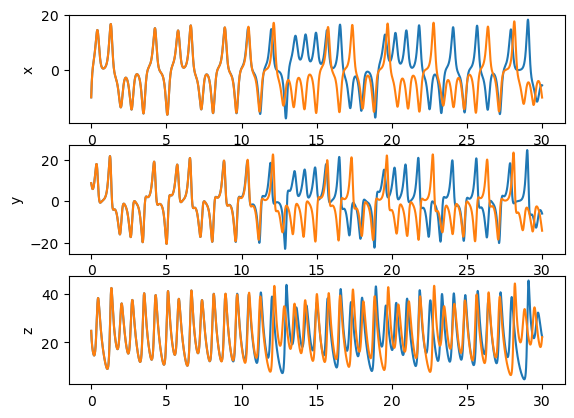

In [3]:
v01 = np.array([-9.7554, 8.75,  24.747])
v02 = np.array([-9.7555, 8.75,  24.747])

tmax = 30
t = np.linspace(0,tmax,10000)
sol1 = solve_ivp( dvdt, [0, tmax], v01, t_eval=t)
sol2 = solve_ivp( dvdt, [0, tmax], v02, t_eval=t )

ti = ['x','y','z']
for i in range(3):
    plt.subplot(3,1,1+i)
    plt.plot(sol1.t, sol1.y[i,:])
    plt.plot(sol2.t, sol2.y[i,:])
    plt.ylabel(ti[i])

Le graphe ci-dessus montre que les deux simulations se comportent de manière tout à fait similaire pour des temps jusque vers des valeurs de 10. Puis au delà les deux simulations divergent complètement. Les résultats n'ont plus rien à voir.

Ce résultat montre qu'une petit différence dans les valeurs initiales entraine dans ce cas une grande différence dans la prévision. On parle de chaos déterministe. Toutes les équations sont connues, mais le système se comporte de manière chaotique, c'est à dire imprévisible de manière certaine pour un temps très long. 

Le système a toutefois un comportement global très structuré. La figure ci-dessous montre l'attracteur de Lorenz qui illustre la trajectoire du système dans l'espace des variables d'états.

In [4]:
# Pour la visualisation interactive
%matplotlib qt 
#%matplotlib inline

ax = plt.axes(projection='3d')
ax.plot3D(sol1.y[0,:],sol1.y[1,:],sol1.y[2,:])
ax.plot3D(sol2.y[0,:],sol2.y[1,:],sol2.y[2,:])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.title('Attracteur de Lorenz')
plt.show()